1. Compute the process leading-order cross section,  𝜎(𝜃;𝑠⎯⎯√) , as a function of the scattering angle  𝜃  and with the center of mass energy  𝑠⎯⎯√  as a parameter. Start by computing it in the center of mass system. N.B.: textbooks reports such cross section in the relativistic limit, i.e. for  𝑠⎯⎯√≫𝑚𝜇 , which is clearly not the case here ( 𝑠⎯⎯√∼2𝑚𝜇 );

**The Differential Cross Section**

The differential cross section expresses the probability that an event happens at each possible scattering angle $\theta$. This equation is only valid in the CoM, center of mass frame. [*reference*]. 

\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right) 
\end{equation}

The differential cross section can be expressed as,

$$\frac{d\sigma}{d \Omega} = a + b~cos^2(\theta)$$

where,

$$a = \frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{e^{4}}{64 \pi^{2} s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right]$$





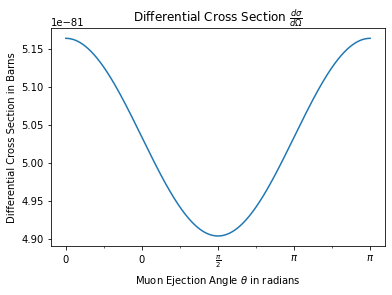

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import axispi as axp

#conversion factor
con1 = 2.56819e-3 #MeV−2,  (DCS MeV-2)/con1 = DCS barns
#----------constants-------------
e = 1.6e-19
#Electron and Muon mass squared
mu2 = 105.658**2 #Mev^2
me2 = 0.5110**2 #Mev^2
S = 4*mu2 + 5000 #5000MeV^2 over threshold energy
#---------------------------------

def ab(s):
    #more constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = e**4/(64 * math.pi**2 * s)
    c2 = c1 * cu**(1/2) * ce**(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b

def dcs(theta,s):#differential cross section
    a,b = ab(s)
    return a+b*math.cos(theta)**2

##Plotting the differential cross section in CoM
res = 1000 #number of points plotted. Resolution of graph
theta = np.linspace(0,np.pi,res)
DSC = [dcs(th,S)/con1 for th in theta] #barns
#xlbl = np.arrange(0,math.pi,math.pi/4)
figDSC, ax = plt.subplots()
ax.plot(theta,DSC)
ax.set_title(r'Differential Cross Section $\frac{d\sigma}{d \Omega}$')
ax.set_xlabel(r'Muon Ejection Angle $\theta$ in radians')
ax.set_ylabel('Differential Cross Section in Barns')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 8))
ax.xaxis.set_major_formatter(plt.FuncFormatter(axp.multiple_formatter()))
